<a href="https://colab.research.google.com/github/anoopjakob/AI_Lab_9_SVM/blob/main/AI_Lab_9_SVM_Qn_1_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**: 

1.Soft margin SVM (refer Lectures 21 to 29 )
Consider the given two data sets, each of which are divided into two parts for train-
ing and testing, respectively. In particular, the first data set includes train 1.txt
for training and test 1.txt for test, and the second one includes train 2.txt and
test 2.txt. In these data sets, the first two columns are features, and the last one
is label. Try the SVM on the two data sets, respectively, and answer the following
questions

  1. Plot the decision boundary of the SVM with the training data.

  2. Use the test data to evaluate the SVM classifier and show the fraction of test
examples which were misclassified.

  3. Try different values of the regularization term c, 
and report your observations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline

In [ ]:
# converting 4 csv's to dataframe
col  = ['feature1', 'feature2', 'label']
 
train_1_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_9/csv/train_1.csv')
train_1_df.columns = col
 
test_1_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_9/csv/test_1.csv')
test_1_df.columns = col
 
train_2_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_9/csv/train_2.csv')
train_2_df.columns = col
 
test_2_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_9/csv/test_2.csv')
test_2_df.columns = col

train_3_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_9/csv/train_3.csv')
train_3_df.columns = col 


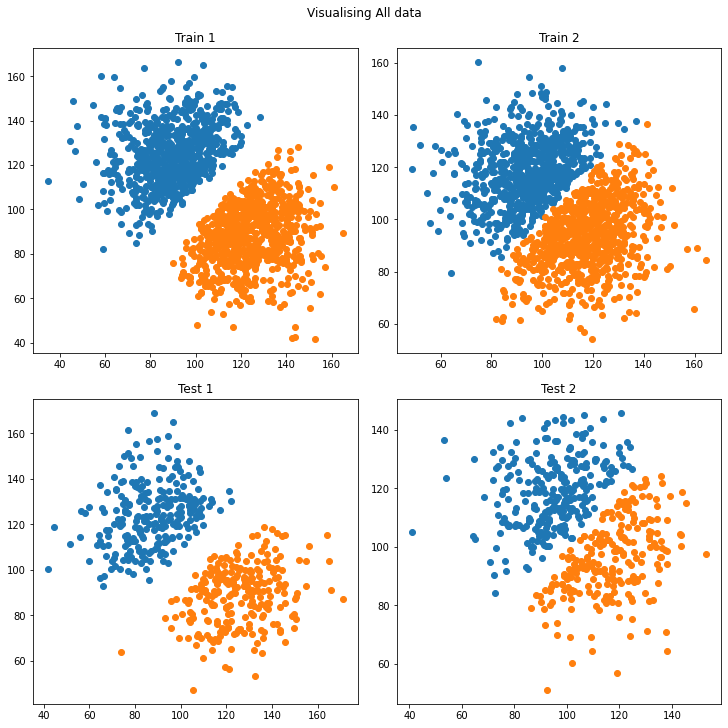

In [ ]:
# plotting all 4 dataframes


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
fig.suptitle('Visualising All data')


ax1.scatter(train_1_df[train_1_df.label==1].feature1, train_1_df[train_1_df.label==1].feature2)
ax1.scatter(train_1_df[train_1_df.label==-1].feature1, train_1_df[train_1_df.label==-1].feature2)
ax1.set_title('Train 1')

ax2.scatter(train_2_df[train_2_df.label==1].feature1, train_2_df[train_2_df.label==1].feature2)
ax2.scatter(train_2_df[train_2_df.label==-1].feature1, train_2_df[train_2_df.label==-1].feature2)
ax2.set_title('Train 2')

ax3.scatter(test_1_df[test_1_df.label==1].feature1, test_1_df[test_1_df.label==1].feature2)
ax3.scatter(test_1_df[test_1_df.label==-1].feature1, test_1_df[test_1_df.label==-1].feature2)
ax3.set_title('Test 1')

ax4.scatter(test_2_df[test_2_df.label==1].feature1, test_2_df[test_2_df.label==1].feature2)
ax4.scatter(test_2_df[test_2_df.label==-1].feature1, test_2_df[test_2_df.label==-1].feature2)
ax4.set_title('Test 2')

fig.show()

In [ ]:
train_1_df.label.values

array([ 1,  1,  1, ..., -1, -1,  1])

In [ ]:
# model
 
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import pylab as pl

cvxopt.solvers.options['show_progress'] = False
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)
 
 
# def gaussian_kernel(x, y, sigma=5):
#     return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))


 
class SVM(object):
  
    # if no kernal information is provided linear kernal is selected as default
    def __init__(self, kernel= linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)
 
    def fit(self, X, y):
        n_samples, n_features = X.shape
 
        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])
 
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)
 
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))
 
        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
 
        # Lagrange multipliers
        a = np.ravel(solution['x'])
 
        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))
 
        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)
 
        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
 
    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b
 
    def predict(self, X):
        return np.sign(self.project(X))
 

# plotting  the decision boundaries of softmargin SVM
def plot_boundary(X1_train, X2_train, clf):
  from pylab import rcParams
  rcParams['figure.figsize'] = 12, 6
  pl.plot(X1_train[:,0], X1_train[:,1], "ro")
  pl.plot(X2_train[:,0], X2_train[:,1], "bo")
  pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")


  X1, X2 = np.meshgrid(np.linspace(np.min(X1_train),np.max(X1_train),50), 
                       np.linspace(np.min(X2_train),np.max(X2_train),50))
  X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
  Z = clf.project(X).reshape(X1.shape)
  pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
  pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
  pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

  pl.axis("tight")
  pl.show()


def SVM_classify(train_df, test_df, kernel = linear_kernel):
  train_df = train_df.astype({'feature1' : 'float', 'feature2' : 'float' , 'label' : 'float'})
  test_df = test_df.astype({'feature1' : 'float', 'feature2' : 'float' , 'label' : 'float'})
  X_train = train_df.drop(['label'], axis=1).values
  y_train = train_df.label.values

  X_test = test_df.drop(['label'], axis = 1).values
  y_test = test_df.label.values

  clf = SVM(C=1, kernel = kernel)

  clf.fit(X_train ,y_train)

  y_predict = clf.predict(X_test)
  correct = np.sum(y_predict == y_test)
  print("%d out of %d predictions correct" % (correct, len(y_predict)))


  plot_boundary(X_train[y_train==1], X_train[y_train==-1], clf)


  plot_boundary(X_test[y_test==1], X_test[y_test==-1], clf)
  
        

    


3 support vectors out of 1500 points
500 out of 500 predictions correct


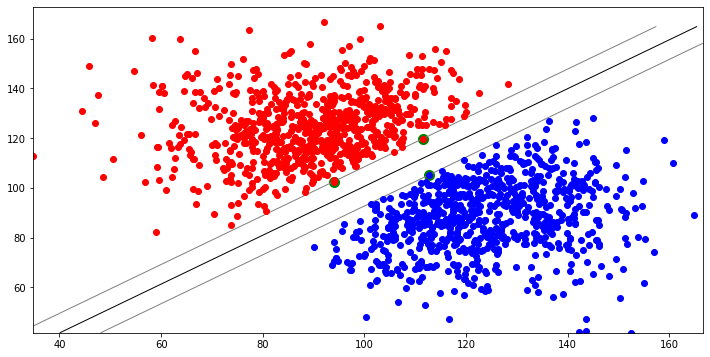

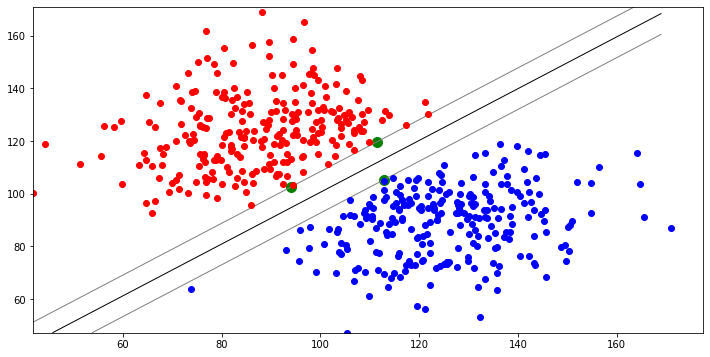

In [ ]:
SVM_classify(train_1_df, test_1_df)

3 support vectors out of 1500 points
500 out of 500 predictions correct


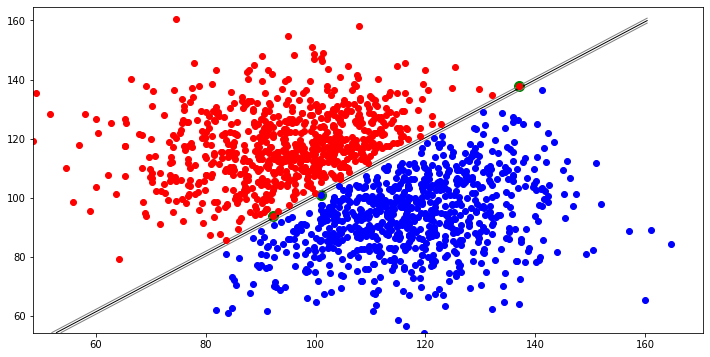

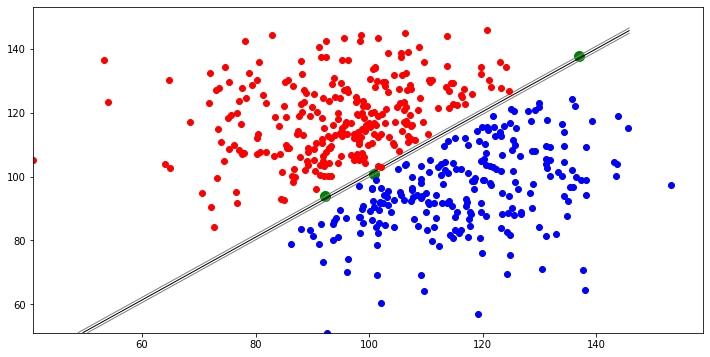

In [ ]:
SVM_classify(train_2_df, test_2_df, linear_kernel)

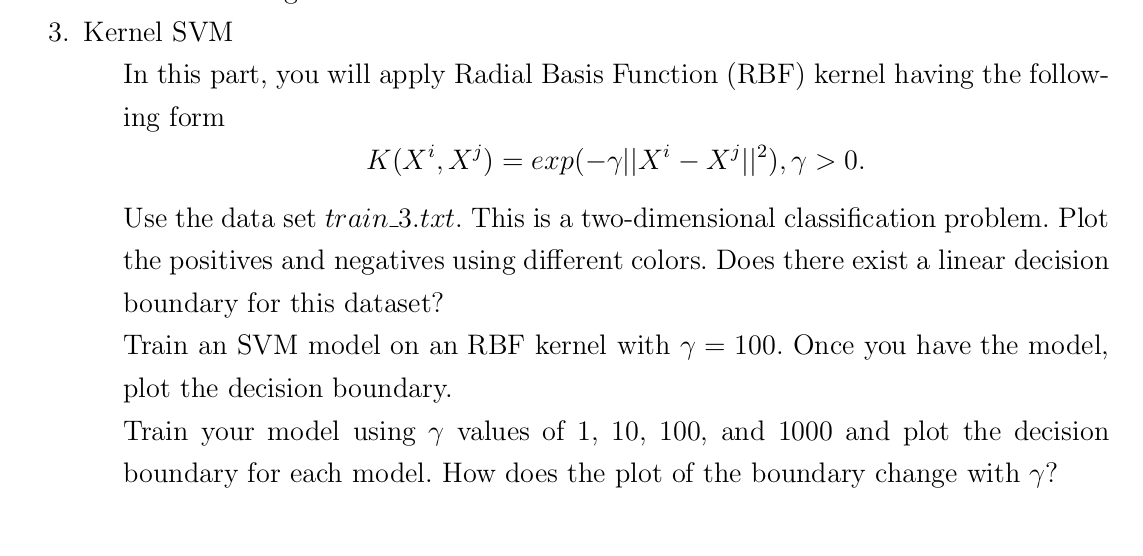

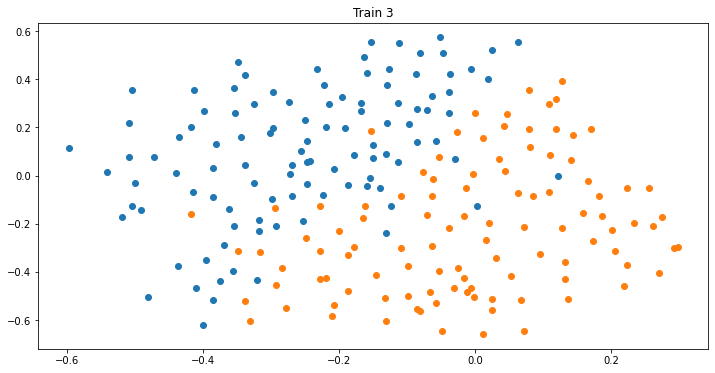

In [ ]:
plt.scatter(train_3_df[train_3_df.label==1].feature1, train_3_df[train_3_df.label==1].feature2)
plt.scatter(train_3_df[train_3_df.label==-1].feature1, train_3_df[train_3_df.label==-1].feature2)
plt.title('Train 3')
plt.show()

99 support vectors out of 211 points
211 out of 211 predictions correct


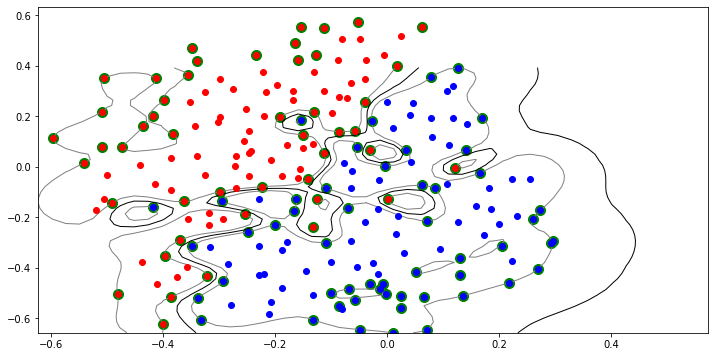

In [ ]:
# only one plot in this function.. same as above

def SVM_classify_2(train_df, test_df, kernel = RBF_kernel):
  train_df = train_df.astype({'feature1' : 'float', 'feature2' : 'float' , 'label' : 'float'})
  test_df = test_df.astype({'feature1' : 'float', 'feature2' : 'float' , 'label' : 'float'})
  X_train = train_df.drop(['label'], axis=1).values
  y_train = train_df.label.values

  X_test = test_df.drop(['label'], axis = 1).values
  y_test = test_df.label.values

  clf = SVM(C=1000, kernel = kernel)

  clf.fit(X_train ,y_train)

  y_predict = clf.predict(X_test)
  correct = np.sum(y_predict == y_test)
  print("%d out of %d predictions correct" % (correct, len(y_predict)))


  plot_boundary(X_train[y_train==1], X_train[y_train==-1], clf)

# function for RBF kernel

def RBF_kernel(x, y, gamma = 100):
    return np.exp(-gamma* linalg.norm(x-y)**2 )

#main function call
SVM_classify_2(train_3_df, train_3_df, RBF_kernel)



53 support vectors out of 211 points
197 out of 211 predictions correct


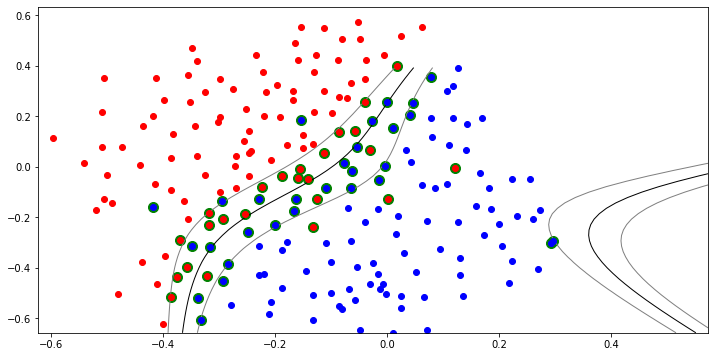

In [ ]:
def RBF_kernel(x, y, gamma = 1):
    return np.exp(-gamma* linalg.norm(x-y)**2 )

SVM_classify_2(train_3_df, train_3_df, RBF_kernel)

61 support vectors out of 211 points
199 out of 211 predictions correct


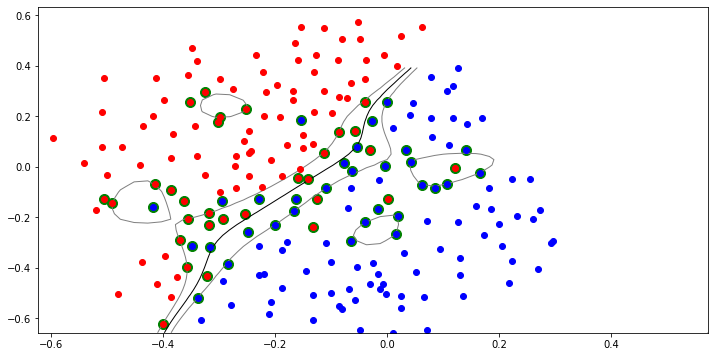

In [ ]:
def RBF_kernel(x, y, gamma = 10):
    return np.exp(-gamma* linalg.norm(x-y)**2 )

SVM_classify_2(train_3_df, train_3_df, RBF_kernel)

209 support vectors out of 211 points
211 out of 211 predictions correct


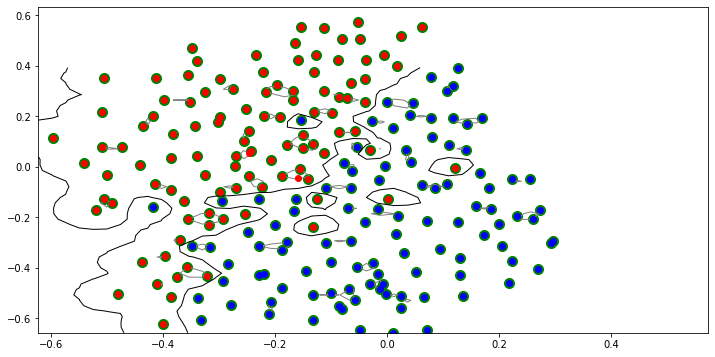

In [ ]:
def RBF_kernel(x, y, gamma = 1000):
    return np.exp(-gamma* linalg.norm(x-y)**2 )

SVM_classify_2(train_3_df, train_3_df, RBF_kernel)